# Creating Model for Deployment
Dataset terdiri dari data penempatan siswa dikampus XYZ. mencakup secondary dan higher secondary school percentage dan specialization. ini juga mencakup specialization, type dan work experience dan tawaran salary kepada siswa yang ditempatkan.

### Import Libraries

In [1]:
!pip3 install pandas_profiling

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
import pickle

%matplotlib inline

#### Load Dataset

In [2]:
data= pd.read_csv('./Dataset/Placement_Data_Full_Class.csv')
data.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [3]:
#Remove Serial Number
data.drop('sl_no',axis=1, inplace=True)
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
print("The shape of the data is (row, column): ", data.shape)
print(data.info())

The shape of the data is (row, column):  (215, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          215 non-null    object 
 1   ssc_p           215 non-null    float64
 2   ssc_b           215 non-null    object 
 3   hsc_p           215 non-null    float64
 4   hsc_b           215 non-null    object 
 5   hsc_s           215 non-null    object 
 6   degree_p        215 non-null    float64
 7   degree_t        215 non-null    object 
 8   workex          215 non-null    object 
 9   etest_p         215 non-null    float64
 10  specialisation  215 non-null    object 
 11  mba_p           215 non-null    float64
 12  status          215 non-null    object 
 13  salary          148 non-null    float64
dtypes: float64(6), object(8)
memory usage: 23.6+ KB
None


In [5]:
report= data.profile_report(title='Campus Placement Data - Report', progress_bar=False)
report

* 67 missing values in salary for students who didn't get placed. NaN value need to be filled.
* Data is not scaled. Salary column ranges from 200k - 940k, rest of numerical columns are percentages.
* 300k at 75th percentile goes all the way up to 940k max, Salary (high skewness). thus outliers at high salary end

In [6]:
report.to_file(output_file='output.html')

### Data Cleaning / Handling Missing Values

In [9]:
data['salary'].fillna(value=0, inplace=True)
print('Salary column with null value: ',data['salary'].isnull().sum(), sep='\n')

Salary column with null value: 
0


### Exploring Data by each Features

In [10]:
'''
Feature : Gender
Does gender affect placements?
'''
data['gender'].value_counts()

M    139
F     76
Name: gender, dtype: int64

/home/dotachin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


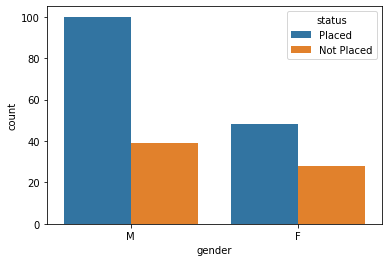

In [13]:
sns.countplot('gender', hue='status', data=data)
plt.show()

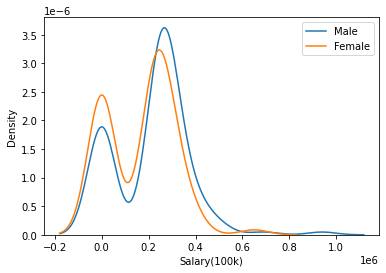

In [14]:
sns.kdeplot(data.salary[data.gender=='M'])
sns.kdeplot(data.salary[data.gender=='F'])
plt.legend(['Male','Female'])
plt.xlabel("Salary(100k)")
plt.show()

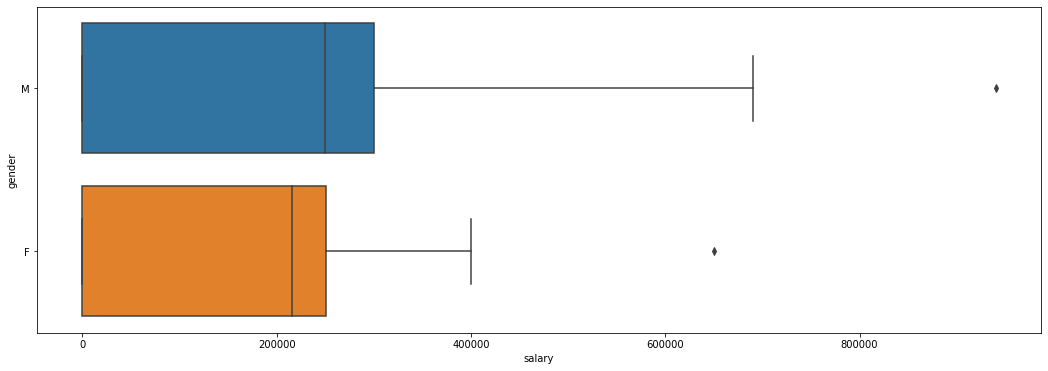

In [16]:
plt.figure(figsize=(18,6))
sns.boxplot('salary','gender',data=data)
plt.show()

insights
* we have samples of 139 Male students and 76 female students
* 30 Female and 40 Male students are not placed. Male students have comparatively higher placements.
* Male students are offered slightly greater salary that female on average

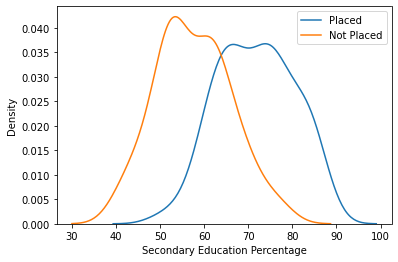

In [18]:
'''
Feature: ssc_p (Secondary Education Percentage), ssc_b (Board of Education)

Does secondary education affect the placement?
'''

sns.kdeplot(data.ssc_p[data.status == 'Placed'])
sns.kdeplot(data.ssc_p[data.status == 'Not Placed'])
plt.legend(['Placed', 'Not Placed'])
plt.xlabel("Secondary Education Percentage")
plt.show()

* All students with secondary education precentage above 90% are placed
* All students with secondary education percentage below 50% are not placed
* Students with good secondary Education percetage are placed on average

/home/dotachin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


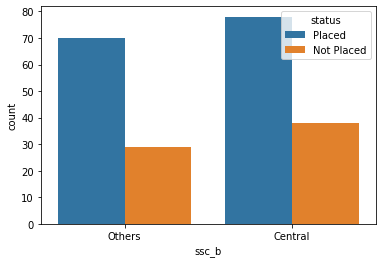

In [19]:
sns.countplot('ssc_b', hue='status', data=data)
plt.show()

Board of Education (ssc_b) tidak banyak mempengaruhi placement status

/home/dotachin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


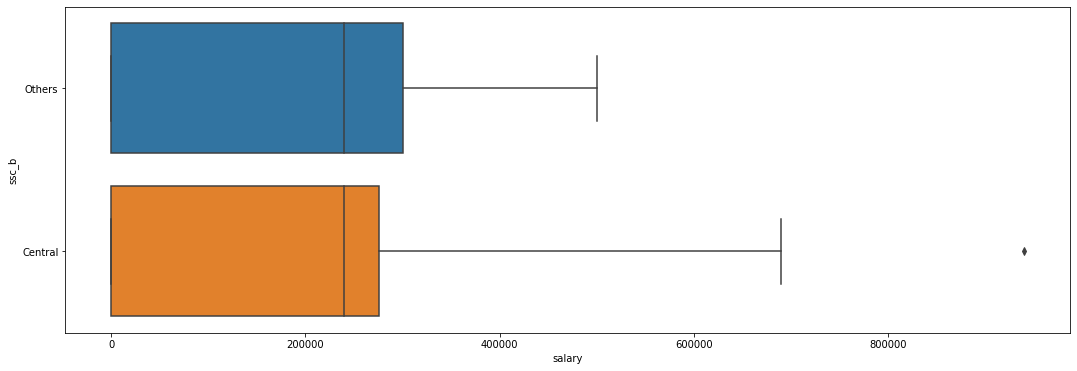

In [21]:
plt.figure(figsize=(18,6))
sns.boxplot('salary','ssc_b', data=data)
plt.show()

/home/dotachin/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


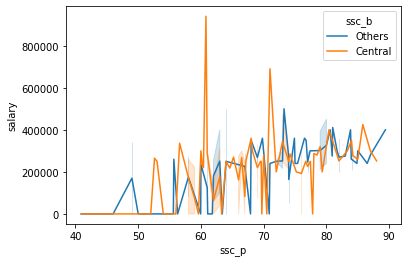

In [22]:
sns.lineplot('ssc_p','salary',hue='ssc_b', data=data)
plt.show()

tidak ada pola khusus (correlation) antara secondary education percentage dan salary, board of education tidak mempengaruhi gaji

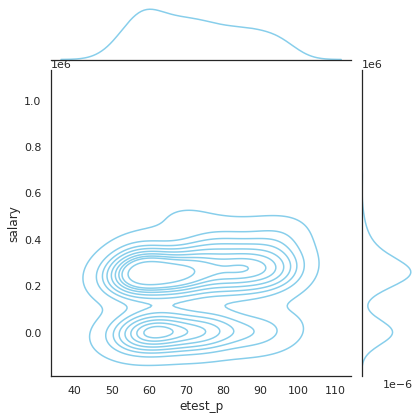

In [24]:
sns.set(rc={'figure.figsize':(12,8)})
sns.set(style='white', color_codes=True)
sns.jointplot(x=data['etest_p'], y=data['salary'], kind='kde', color='skyblue')
plt.show()


/home/dotachin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dotachin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/dotachin/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `h

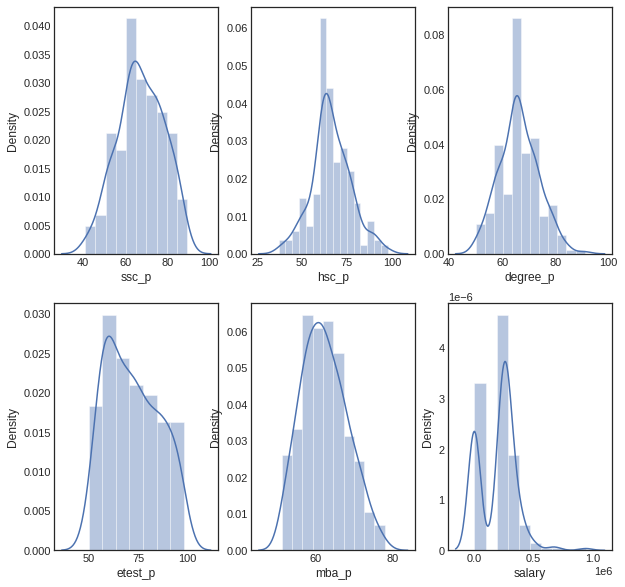

In [27]:
plt.figure(figsize=(15,7))
plt.style.use('seaborn-white')
plt.subplot(231)
sns.distplot(data['ssc_p'])
fig= plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(232)
sns.distplot(data['hsc_p'])
fig= plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(233)
sns.distplot(data['degree_p'])
fig= plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(234)
sns.distplot(data['etest_p'])
fig= plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(235)
sns.distplot(data['mba_p'])
fig= plt.gcf()
fig.set_size_inches(10,10)

plt.subplot(236)
sns.distplot(data['salary'])
fig= plt.gcf()
fig.set_size_inches(10,10)

* Semua distribusi mengikuti distribusi normal keculai salary feature
* sebagian besar kandidat edukasi menunjukkan antara 60-80%
* distribusi salaray terdapat outliers dimana beberapa mendapat salary dari 7.5L dan 10L PA

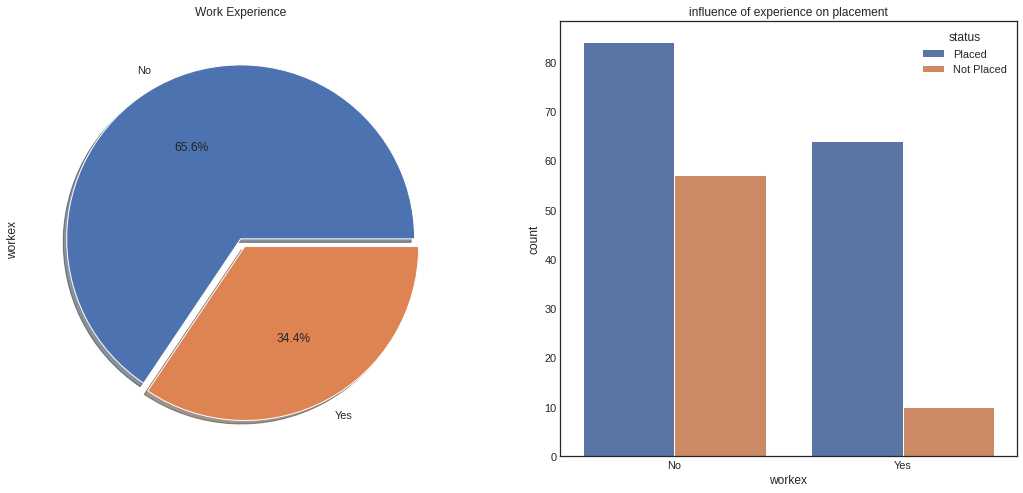

In [29]:
plt.style.use('seaborn-white')
f,ax= plt.subplots(1,2, figsize=(18,8))
data['workex'].value_counts().plot.pie(explode=[0,0.05],autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Work Experience')
sns.countplot(x='workex',hue='status',data=data)
ax[1].set_title("influence of experience on placement")
plt.show()


### Preprocessing data for classification model

In [49]:
from sklearn.preprocessing import LabelEncoder
object_col = ['gender','workex','specialisation','status']
label_encoder= LabelEncoder()
for col in object_col:
    data[col]=label_encoder.fit_transform(data[col])
data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,0,55.0,1,58.80,1,270000.0
1,1,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,1,86.5,0,66.28,1,200000.0
2,1,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,0,75.0,0,57.80,1,250000.0
3,1,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,0,66.0,1,59.43,0,0.0
4,1,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,0,96.8,0,55.50,1,425000.0


In [63]:
# library imports
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [64]:
#Separating features and target
X= data[['ssc_p','hsc_p','degree_p','etest_p']]
y= data['status']

#Train test split
x_train, x_test, y_train, y_test= train_test_split(X, y, test_size=0.3, random_state=4)


In [65]:
# Decision Tree
dtree= DecisionTreeClassifier()
dtree.fit(x_train, y_train)
ypred= dtree.predict(x_test)
print("acc: ",accuracy_score(y_test, ypred))
print(classification_report(y_test, ypred))

acc:  0.7846153846153846
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        20
           1       0.83      0.87      0.85        45

    accuracy                           0.78        65
   macro avg       0.75      0.73      0.74        65
weighted avg       0.78      0.78      0.78        65



In [66]:
# Random Forest
rf= RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)
ypred= rf.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, ypred))
print(classification_report(y_test,ypred))

Accuracy:  0.8615384615384616
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        20
           1       0.89      0.91      0.90        45

    accuracy                           0.86        65
   macro avg       0.84      0.83      0.84        65
weighted avg       0.86      0.86      0.86        65



In [68]:
#Logistic Regression
log_reg= LogisticRegression(solver='lbfgs')
log_reg.fit(x_train, y_train)
ypred= log_reg.predict(x_test)
print("Accuracy: ", accuracy_score(y_test, ypred))
print(classification_report(y_test, ypred))

Accuracy:  0.8461538461538461
              precision    recall  f1-score   support

           0       0.78      0.70      0.74        20
           1       0.87      0.91      0.89        45

    accuracy                           0.85        65
   macro avg       0.83      0.81      0.81        65
weighted avg       0.84      0.85      0.84        65



In [69]:
pickle.dump(rf, open('model_classifier.pkl','wb'))

In [ ]:
read_classifier= 